### Урок 3. Классификация. Логистическая регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [110]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [5]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [6]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(np.clip(-z, -250, 250)))
    return res

In [8]:
z = np.linspace(-10, 10, 101)

In [9]:
probabilities = sigmoid(z)

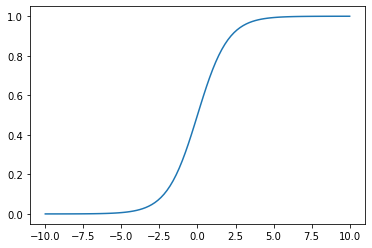

In [10]:
plt.plot(z, probabilities)
plt.show()

In [ ]:
Logistic Regression

In [109]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        #if i % (iterations / 10) == 0:
        #    print(i, W, err)
    return W

In [111]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

In [116]:
from sklearn.metrics import log_loss as lg

In [121]:
y_pred = sigmoid(np.dot(W.T,X))

In [72]:
def calc_logloss(y, y_pred, eps=1e-10):
    err = - np.mean(y * np.log(y_pred+eps) + (1.0 - y) * np.log(1.0 - y_pred + eps))
    err = np.sum(err)
    return err

In [73]:
def alt_log_loss(y, y_pred, eps=1e-10):
    return (-y.dot(np.log(y_pred+eps)) - ((1-y).dot(np.log(1-y_pred + eps)))) / len(y)

In [117]:
def log_loss(w, X, y, eps=1e-10):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A+eps) + (1 - y) * np.log(1 - A + eps))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [122]:
calc_logloss(y, y_pred)

11.51292546492023

In [129]:
alt_log_loss(y, y_pred)

11.51292546492023

In [124]:
log_loss(W, X, y)[0]

11.51292546492023

In [133]:
lg(y, y_pred, eps=1e-10)

11.512925423650046

In [131]:
lg(y, y_pred, eps=1e-10, normalize=False)

115.12925423650046

In [132]:
alt_log_loss(y, y_pred) * len(y)

115.1292546492023

In [78]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        #if i % (iterations/10) ==0:
        #    print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X.T)

In [102]:
from sklearn.model_selection import ParameterGrid
params = {'alpha': np.logspace(-10, 0, 22), 'iterations': np.arange(100, 1200, 200)}

pg = ParameterGrid(param_grid=params)

min_logloss = np.inf
best_params = {'alpha': None, 'iterations': None}

for p in list(pg):
    alpha, iters = p['alpha'], p['iterations']
    W = logreg_eval_model(X_st.T, y, iterations=iters, alpha=alpha)
    y_pred = sigmoid(np.dot(X_st, W))
    log_loss = calc_logloss(y, y_pred)
    if log_loss < min_logloss:
        min_logloss = log_loss
        best_params['alpha'] = alpha
        best_params['iterations'] = iters

In [104]:
W = eval_model(X_st.T, y, **best_params)

y_pred = sigmoid(np.dot(X_st, W))
calc_logloss(y, y_pred)

0.23254143594079552

In [84]:
def calc_pred_proba(W, X):
    return sigmoid(np.dot(X, W))

In [85]:
print(*calc_pred_proba(W, X_st), sep='\n')

0.238502743475629
0.07457380546692467
0.9993026727195765
3.885543033667446e-05
0.6075715986401838
0.24633415686760482
0.9997096562227041
0.003523864875083174
0.30544196525640327
0.996206286472391


In [86]:
def calc_pred(W, X, thres=0.5):
    y_pred = calc_pred_proba(W, X)
    return np.where(y_pred >= thres, 1, 0)

In [87]:
calc_pred(W, X_st) == y

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [88]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [89]:
res = calc_pred(W, X_st)
print(f'Accuracy: {(res==y).mean():.4f}, sklearn: {accuracy_score(y, res):.4f}')

Accuracy: 0.9000, sklearn: 0.9000


In [91]:
res, '', y.astype(int)

(array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1]),
 '',
 array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]))

In [92]:
TP = ((res == 1) & (y == 1)).sum()
FP = ((res == 1) & (y == 0)).sum()
TN = ((res == 0) & (y == 0)).sum()
FN = ((res == 0) & (y == 1)).sum()

In [93]:
print(f'Precision: {(TP / (TP+FP)):.4f}, sklearn: {precision_score(y, res):.4f}')

Precision: 1.0000, sklearn: 1.0000


In [94]:
print(f'Recall: {(TP / (TP+FN)):.4f}, sklearn: {recall_score(y, res):.4f}')

Recall: 0.8000, sklearn: 0.8000


In [95]:
prec = TP / (TP + FP)
rec = TP / (TP + FN)
print(f'F1: {(2*prec*rec/(prec+rec)):.4f}, sklearn: {f1_score(y, res):.4f}')

F1: 0.8889, sklearn: 0.8889


In [101]:
import pandas as pd
conf = pd.DataFrame(data=np.array([[TN, FP], [FN, TP]]), columns=['0', '1'], index=['0', '1'])
print(conf)

   0  1
0  5  0
1  1  4


In [92]:
confusion_matrix(y, res)

array([[5, 0],
       [1, 4]])

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay

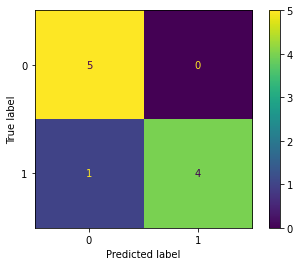

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y, res)).plot()

Могла ли модель переобучиться? Почему?

Учитывая очень маленькое (нерепрезентативное) количество образцов в обучающем наборе данных модель в подавляющем большинстве случаев будет переобучаться. При сильном переобучении на обучающем наборе может вовсе не оказаться ошибок в предсказании. При этом, на тестовой выборке результат предсказаний будет неадекватным.